<a href="https://colab.research.google.com/github/Jieling1999/Heart_Failure_Prediction/blob/master/Heart_Failure_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Understanding

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide. The heart failure is a common event caused by CVDs. Most CVDs can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies. 
So, the primary goal from a business perspective is to predict mortality by heart failure. This project is commissioned with the patients who are at high cardiovascular risk will lead to high death. The subjective criteria of success of this project will be judged from the fact that at least 10% of patients with cardiovascular disease have died.  The data mining success criteria is the accuracy of models are higher.
The personnel involved are business experts, data experts and data mining experts. The data mining tool used in this project is Kaggle. The hardware involved is a computer device. The risk is if an Internet outage in my home could pose a problem, my contingency could be to work at another place until the outage has ended. 
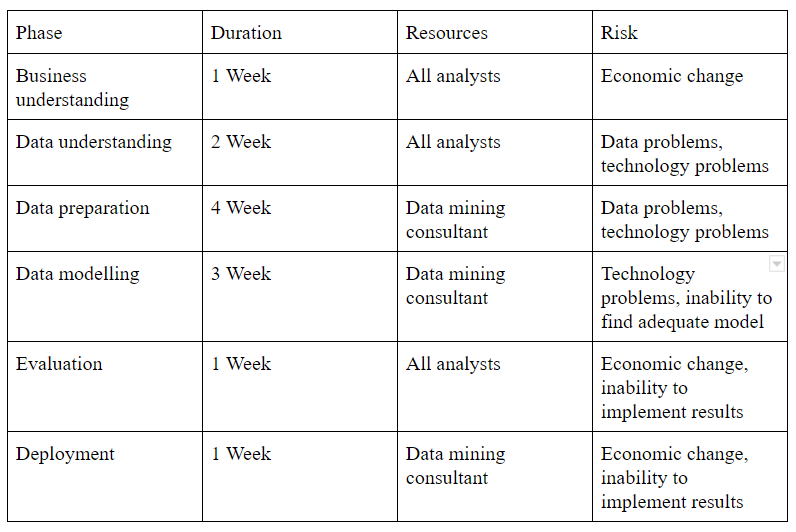



**Import Library**

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from operator import add
import seaborn as sns

%matplotlib inline

# Data Understanding

**Source:**

The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on patients. The classification goal is to predict mortality of patients by heart failure. The dataset provides the patients’ information. It includes over 299 records and 13 attributes. Variables Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.


**Attributes:**

Demographic:
1. sex: male or female(Nominal)
2. age: Age of the patient(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
3. time: Follow-up period (days)(Continuous)

**Behavioral:**

4. smoking: whether or not the patient is a current smoker (Nominal)

**Information on medical condition:**

5. diabetes: whether or not the patient had diabetes (Nominal)
6. anaemia: whether or not the patient had anaemia (Nominal)
7. creatinine_phosphokinase: Percentage of blood leaving the heart at each contraction(Continuous)
8. ejection_fraction: Percentage of blood leaving the heart at each contraction(Continuous)
9. high_blood_pressure: If the patient has hypertension (Nominal)
10. platelets: Platelets in the blood(Continuous)
11. serum_creatinine: Level of serum creatinine in the blood (Continuous)
12. serum_sodium: Level of serum sodium in the blood (Continuous)

**Target variable to predict:**

13. DEATH_EVENT: If the patient deceased during the follow-up period (binary: “1”, means “Yes”, “0” means “No”)

In [ ]:
heart_data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
heart_data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# Data Preprocessing


**3.1 Checking for null values**

In [ ]:
heart_data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

There are no missing value on each attribute.

**3.2 Finding outliers**

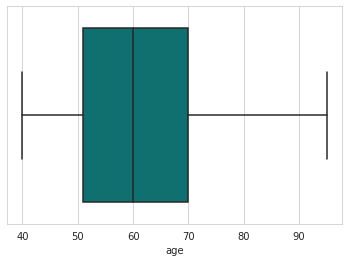

In [ ]:
# Boxplot for age

sns.boxplot(x = heart_data.age, color = 'teal')
plt.show()

No outlier in age

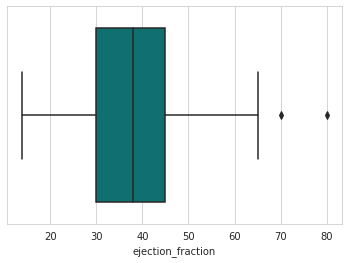

In [ ]:
# Boxplot for ejection_fraction

sns.boxplot(x = heart_data.ejection_fraction, color = 'teal')
plt.show()

In [ ]:
heart_data[heart_data['ejection_fraction']>=70]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
64,45.0,0,582,0,80,0,263358.03,1.18,137,0,0,63,0
217,54.0,1,427,0,70,1,151000.00,9.00,137,0,0,196,1


In [ ]:
heart_data = heart_data[heart_data['ejection_fraction']<70]

Remove the outliers in ejection_fraction

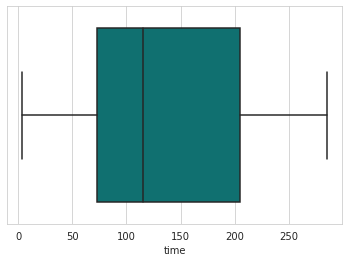

In [ ]:
# Boxplot for time

sns.boxplot(x=heart_data.time, color = 'teal')
plt.show()

No outliers in time

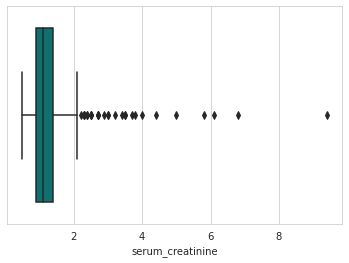

In [ ]:
# Boxplot for serum_creatinine

sns.boxplot(x=heart_data.serum_creatinine, color = 'teal')
plt.show()

When We researched a bit we found that all the values in serum_creatinine falls in possible range of values. So they are not outliers. 
They are actual data points that helps in predicting DEATH_EVENT. 

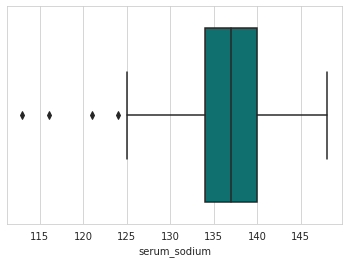

In [ ]:
# Boxplot for serum_sodium

sns.boxplot(x = heart_data.serum_sodium, color = 'teal')
plt.show()

When We researched a bit we found that all the values in serum_sodium falls in possible range of values. So they are not outliers. They are actual data points that helps in predicting DEATH_EVENT. But the patients with below 120 serum_sodium level are in severe conditions.

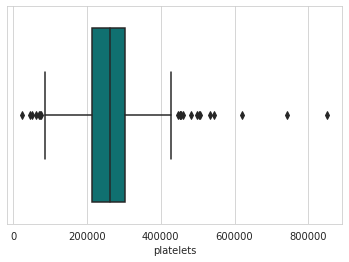

In [ ]:
# Boxplot for platelets

sns.boxplot(x = heart_data.platelets, color = 'teal')
plt.show()

When We researched a bit we found that all the values in platelets falls in possible range of values. So they are not outliers. They are actual data points that helps in predicting DEATH_EVENT. The platelets level can be close to zero, over 750000 or 1000000 if there are other risk factors. 

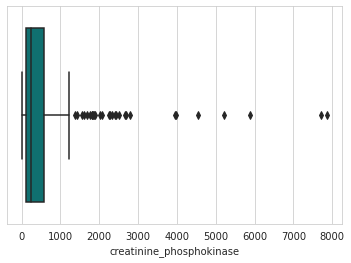

In [ ]:
# Boxplot for creatinine_phosphokinase

sns.boxplot(x = heart_data.creatinine_phosphokinase, color = 'teal')
plt.show()

When We researched a bit we found that all the values in creatinine_phosphokinase falls in possible range of values. So they are not outliers. They are actual data points that helps in predicting DEATH_EVENT.

**3.3 Data Distribution**


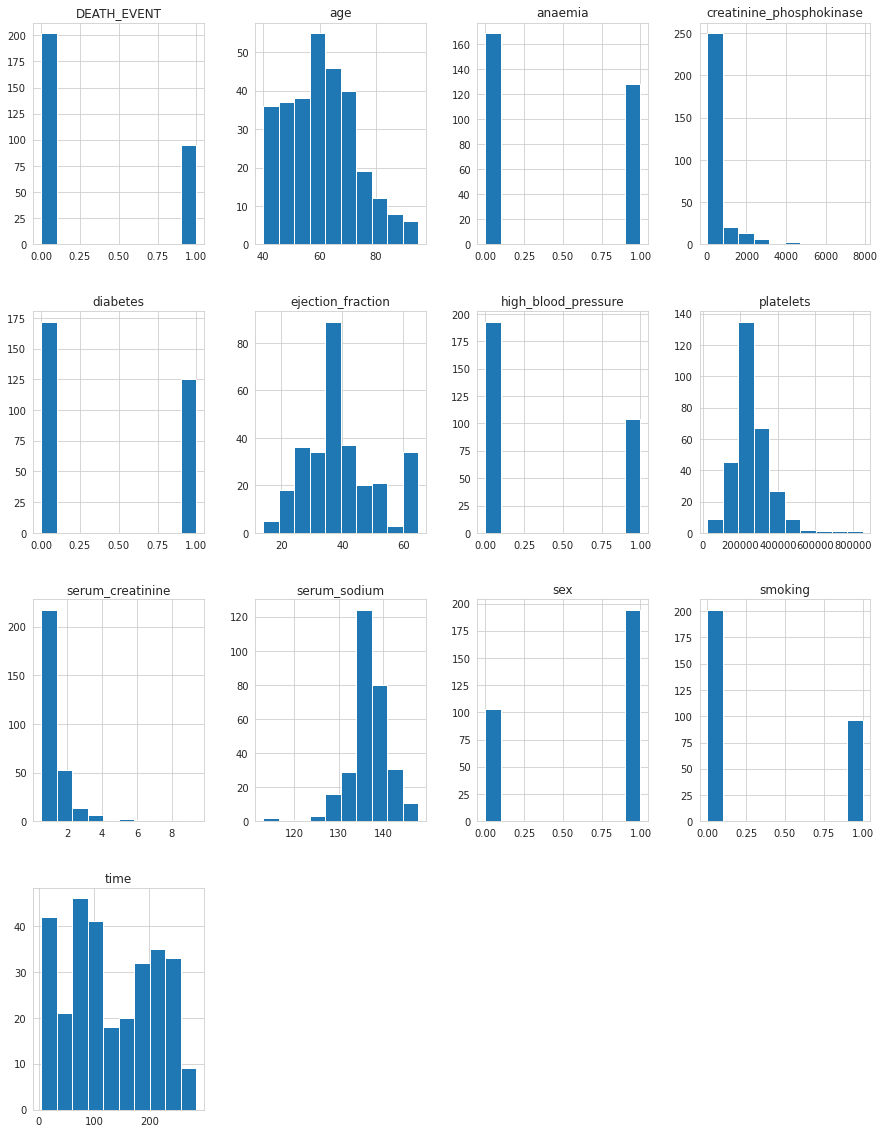

In [ ]:
# plot histogram to see the distribution of the data
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
heart_data.hist(ax = ax)
plt.show()

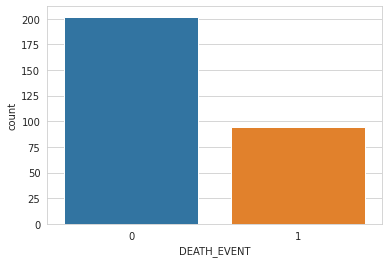

There are 202 patients without heart disease and 95 patients with the disease


In [ ]:
sns.countplot(x='DEATH_EVENT',data=heart_data)
plt.show()
cases = heart_data.DEATH_EVENT.value_counts()
print(f"There are {cases[0]} patients without heart disease and {cases[1]} patients with the disease")

**3.4 Number of patients who have disease vs age**


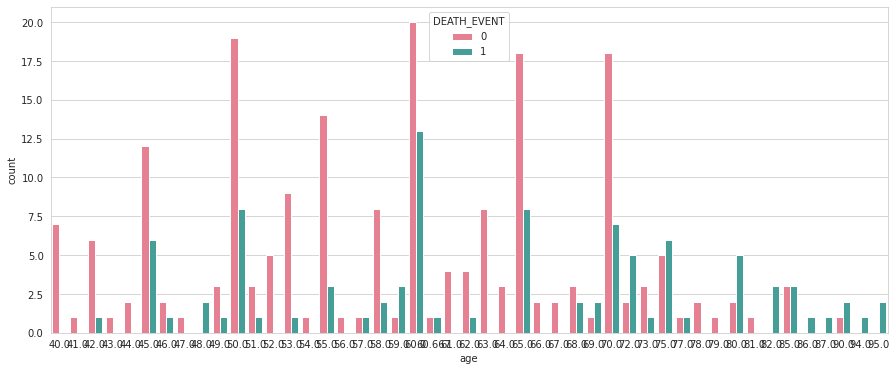

The patients with the highest risk of death is on 60 age i.e. the blue bars


In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x='age',data = heart_data, hue = 'DEATH_EVENT',palette='husl')
plt.show()
print("The patients with the highest risk of death is on 60 age i.e. the blue bars")

**3.5 Data analysis**


In [ ]:

def stacked_barchart(data, title = None, ylabel = None, xlabel = None):
    default_colors = ['#008080', '#5f3c41', '#219AD8']
    # From raw value to percentage
    totals = data.sum(axis=1)
    bars = ((data.T / totals) * 100).T
    r = list(range(data.index.size))

    # Plot
    barWidth = 0.95
    names = data.index.tolist()
    bottom = [0] * bars.shape[0]

    # Create bars
    color_index = 0
    plots = []
    for bar in bars.columns:
        plots.append(plt.bar(r, bars[bar], bottom=bottom, color=default_colors[color_index], edgecolor='white', width=barWidth))
        bottom = list(map(add, bottom, bars[bar]))
        color_index = 0 if color_index >= len(default_colors) else color_index + 1

    # Custom x axis
    plt.title(title)
    plt.xticks(r, names)
    plt.xlabel(data.index.name if xlabel is None else xlabel)
    plt.ylabel(data.columns.name if ylabel is None else ylabel)
    ax = plt.gca()
        
    y_labels = ax.get_yticks()
    ax.set_yticklabels([str(y) + '%' for y in y_labels])

    flat_list = [item for sublist in data.T.values for item in sublist]
    for i, d in zip(ax.patches, flat_list):
        data_label = str(d) + " (" + str(round(i.get_height(), 2)) + "%)"
        ax.text(i.get_x() + 0.45, i.get_y() + 5, data_label, horizontalalignment='center', verticalalignment='center', fontdict = dict(color = 'white', size = 20))

    for item in ([ax.title]):
        item.set_fontsize(27)
        
    for item in ([ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(24)
    
    legend = ax.legend(plots, bars.columns.tolist(), fancybox=True)
    plt.setp(legend.get_texts(), fontsize='20')

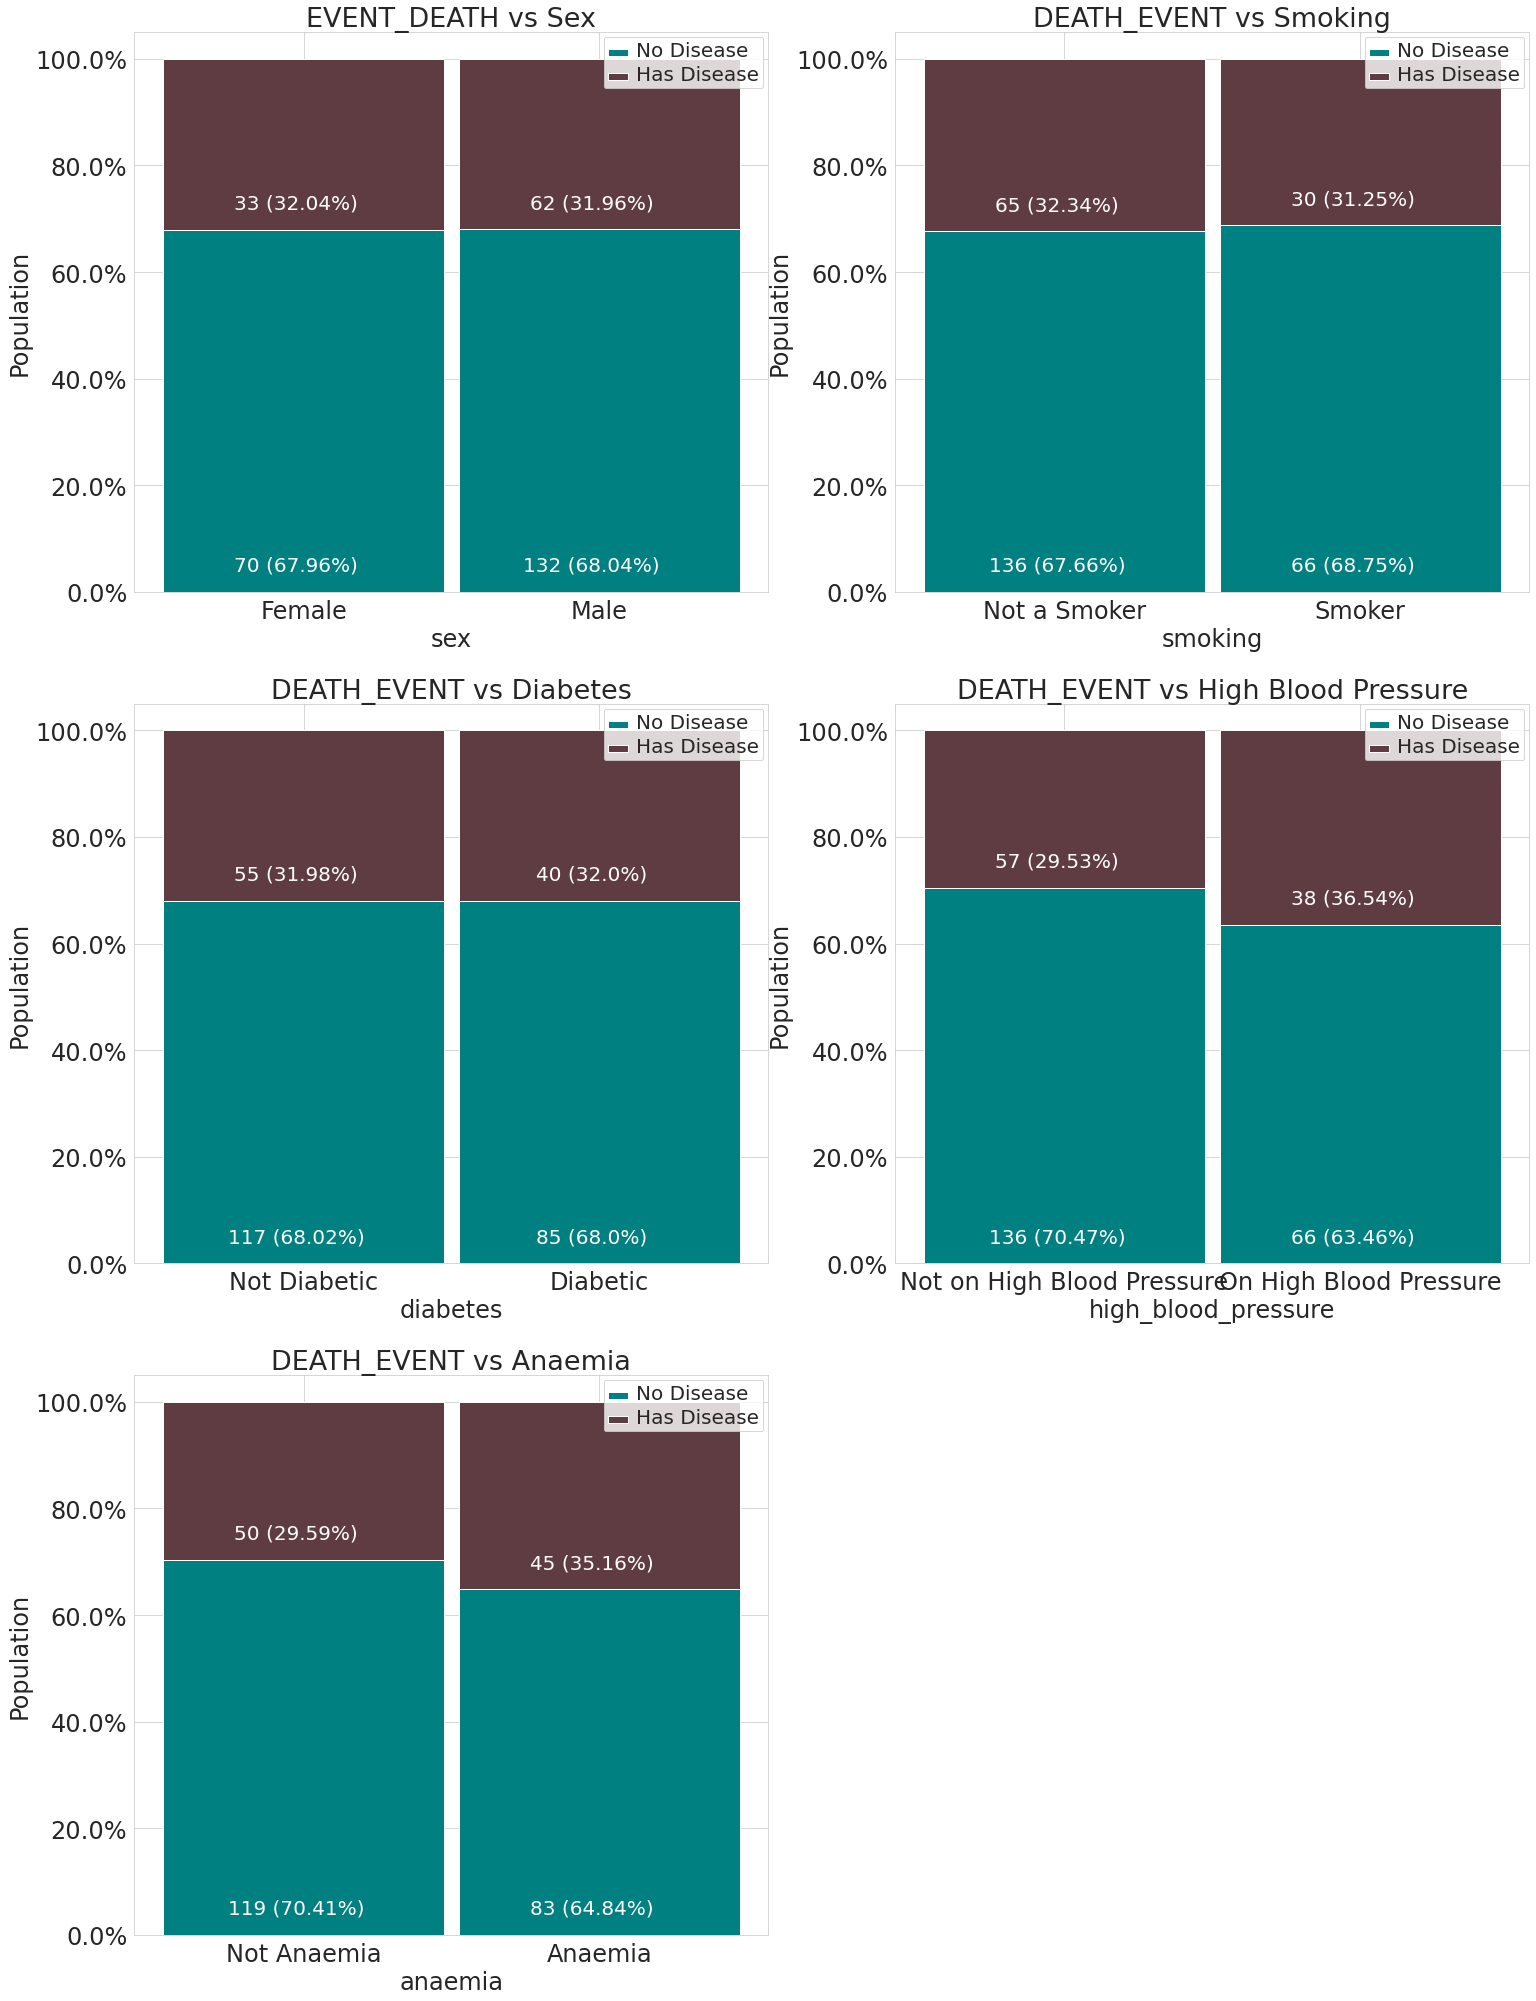

In [ ]:
fig = plt.gcf()
fig.set_size_inches(25, 35)
grid_rows = 3
grid_cols = 2

#draw sex vs disease outcome
plt.subplot(grid_rows, grid_cols, 1)
temp = heart_data[['sex','DEATH_EVENT']].groupby(['sex','DEATH_EVENT']).size().unstack('DEATH_EVENT')
temp.rename(index={0:'Female', 1:'Male'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'EVENT_DEATH vs Sex', ylabel = 'Population')

#draw smoking satus vs disease outcome
plt.subplot(grid_rows, grid_cols, 2)
temp = heart_data[['smoking','DEATH_EVENT']].groupby(['smoking','DEATH_EVENT']).size().unstack('DEATH_EVENT')
temp.rename(index={0:'Not a Smoker', 1:'Smoker'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'DEATH_EVENT vs Smoking', ylabel = 'Population')

#draw diabetes vs disease outcome
plt.subplot(grid_rows, grid_cols, 3)
temp = heart_data[['diabetes','DEATH_EVENT']].groupby(['diabetes','DEATH_EVENT']).size().unstack('DEATH_EVENT')
temp.rename(index={0:'Not Diabetic', 1:'Diabetic'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'DEATH_EVENT vs Diabetes', ylabel = 'Population')

#draw HBP vs disease outcome
plt.subplot(grid_rows, grid_cols, 4)
temp = heart_data[['high_blood_pressure','DEATH_EVENT']].groupby(['high_blood_pressure','DEATH_EVENT']).size().unstack('DEATH_EVENT')
temp.rename(index={0:'Not on High Blood Pressure', 1:'On High Blood Pressure'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'DEATH_EVENT vs High Blood Pressure', ylabel = 'Population')

#draw anaemia vs disease outcome
plt.subplot(grid_rows, grid_cols, 5)
temp = heart_data[['anaemia','DEATH_EVENT']].groupby(['anaemia','DEATH_EVENT']).size().unstack('DEATH_EVENT')
temp.rename(index={0:'Not Anaemia', 1:'Anaemia'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'DEATH_EVENT vs Anaemia', ylabel = 'Population')

**3.6 Correlation Heat map**


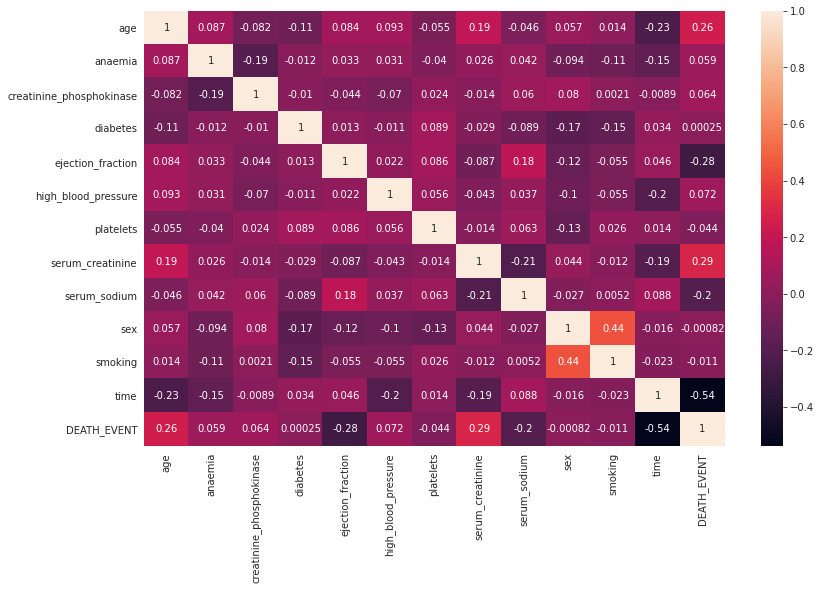

In [ ]:
plt.figure(figsize=(13,8))
sns.heatmap(heart_data.corr(), annot = True)
plt.show()

There are no features with more than 0.4 correlation with the death event and this shows that the features a poor predictors.

Also there are a couple of features that are highly correlated with one another and it makes no sense to use both of them in building a machine learning model. These incluse: Sex and smoking. Therefore we need to carry out feature selection to pick the best fetaures

**4. Feature Selection**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

#define the features
X = heart_data.iloc[:,:-1].values
y = heart_data.iloc[:,-1].values

forest = RandomForestClassifier(n_estimators=1000, n_jobs=-1, class_weight='balanced')

# define Boruta feature selection method
feat_selector = BorutaPy(forest, n_estimators='auto', verbose=2)
 
# find all relevant features
feat_selector.fit(X, y)


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	4
Tentative: 	3
Rejected: 	5
Iteration: 	9 / 100
Confirmed: 	4
Tentative: 	3
Rejected: 	5
Iteration: 	10 / 100
Confirmed: 	4
Tentative: 	3
Rejected: 	5
Iteration: 	11 / 100
Confirmed: 	4
Tentative: 	3
Rejected: 	5
Iteration: 	12 / 100
Confirmed: 	4
Tentative: 	3
Rejected: 	5
Iteration: 	13 / 100
Confirmed: 	4
Tentative: 	3
Rejected: 	5
Iteration: 	14 / 100
Confirmed: 	4
Tentative: 	3
Rejected: 	5
Iteration: 	15 / 100
Confirmed: 	4
Tentative: 	3
Rejected: 	5
Iteration: 	16 / 100
Confirmed: 	4
Tentative: 	3
Rejected: 	5
Iteration:

BorutaPy(alpha=0.05,
         estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                          class_weight='balanced',
                                          criterion='gini', max_depth=None,
                                          max_features='auto',
                                          max_leaf_nodes=None, max_samples=None,
                                          min_impurity_decrease=0.0,
                                          min_impurity_split=None,
                                          min_samples_leaf=1,
                                          min_samples_split=2,
                                          min_weight_fraction_leaf=0.0,
                                          n_estimators=34, n_jobs=-1,
                                          oob_score=False,
                                          random_state=RandomState(MT19937) at 0x7FC3AE6FC888,
                                          verbose=0, warm_star

In [ ]:
#top 3 features
top_features = heart_data.columns[:-1][feat_selector.ranking_<=3].tolist()
top_features


['age',
 'creatinine_phosphokinase',
 'ejection_fraction',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'time']

In [ ]:
# show the most important features
most_important = heart_data.columns[:-1][feat_selector.support_].tolist()
most_important

['age', 'ejection_fraction', 'serum_creatinine', 'time']

**4.1 Statistics on the top features**


In [ ]:
import statsmodels.api as sm
X_top = heart_data[top_features]
y = heart_data['DEATH_EVENT']
res = sm.Logit(y,X_top).fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.375991
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            DEATH_EVENT   No. Observations:                  297
Model:                          Logit   Df Residuals:                      290
Method:                           MLE   Df Model:                            6
Date:                Sun, 13 Sep 2020   Pseudo R-squ.:                  0.4001
Time:                        09:17:56   Log-Likelihood:                -111.67
converged:                       True   LL-Null:                       -186.15
Covariance Type:            nonrobust   LLR p-value:                 1.283e-29
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
age                          0.0518      0.015      3.361      0.001       0.022       0.082
creatinine_phosphokinase     0.0002      0.000      1.075      0.282      -0.000       0.001
ejection_fraction           -0.0765      0.016     -4.672      0.000      -0.109      -0.044
platelets                -6.866e-07   1.79e-06     -0.384      0.701   -4.19e-06    2.82e-06
serum_creatinine             0.5805      0.208      2.794      0.005       0.173       0.988
serum_sodium                 0.0028      0.008      0.327      0.744      -0.014       0.019
time                        -0.0206      0.003     -7.097      0.000      -0.026      -0.015
============================================================================================
"""

In [ ]:
params = res.params
conf = res.conf_int()
conf['Odds Ratio'] = params
conf.columns = ['5%', '95%', 'Odds Ratio']
print(np.exp(conf))

                                5%       95%  Odds Ratio
age                       1.021846  1.085523    1.053203
creatinine_phosphokinase  0.999852  1.000509    1.000180
ejection_fraction         0.897094  0.956565    0.926352
platelets                 0.999996  1.000003    0.999999
serum_creatinine          1.189141  2.685119    1.786892
serum_sodium              0.986249  1.019572    1.002772
time                      0.974044  0.985193    0.979603


Time feature split the data well


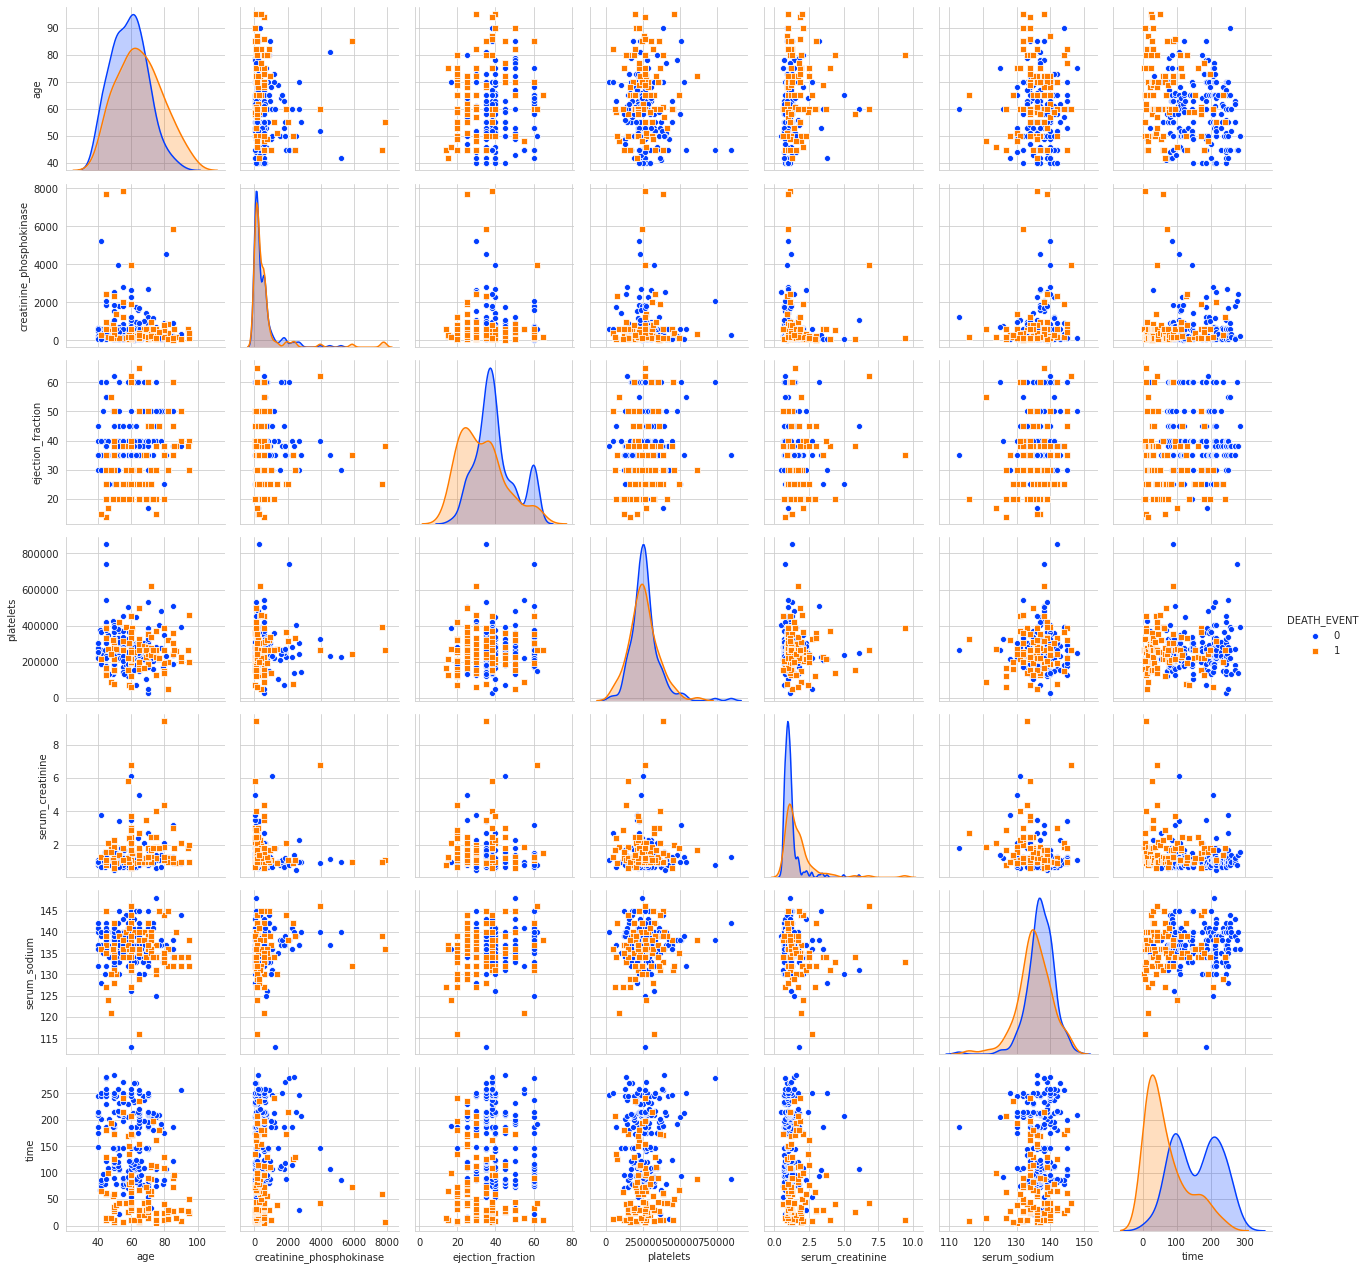

In [ ]:
sns.pairplot(heart_data, hue = 'DEATH_EVENT', markers=["o", "s"], vars = top_features, palette = sns.color_palette("bright", 10))
print("Time feature split the data well")

# Data Modelling


Since the dataset is imbalanced i.e for every positive case there are about 6 negative cases. We may end up with a classifier that mostly predicts negative classes thus have a high accuracy but poor specificity or sensitivity. To adress this we will balance the dataset using The Synthetic Minority Oversampling Technique (SMOTE).



**5.1 SMOTE**

SMOTE first selects a minority class instance a at random and finds its k nearest minority class neighbors. The synthetic instance is then created by choosing one of the k nearest neighbors b at random and connecting a and b to form a line segment in the feature space. The synthetic instances are generated as a convex combination of the two chosen instances a and b.

— Page 47, Imbalanced Learning: Foundations, Algorithms, and Applications, 2013.

This procedure can be used to create as many synthetic examples for the minority class as are required. It suggests first using random undersampling to trim the number of examples in the majority class, then use SMOTE to oversample the minority class to balance the class distribution.

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

X = heart_data[top_features]
y = heart_data.iloc[:,-1]

# the numbers before smote
num_before = dict(Counter(y))

#perform smoting

# define pipeline
over = SMOTE(sampling_strategy=0.8)
under = RandomUnderSampler(sampling_strategy=0.8)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# transform the dataset
X_smote, y_smote = pipeline.fit_resample(X, y)


#the numbers after smote
num_after =dict(Counter(y_smote))


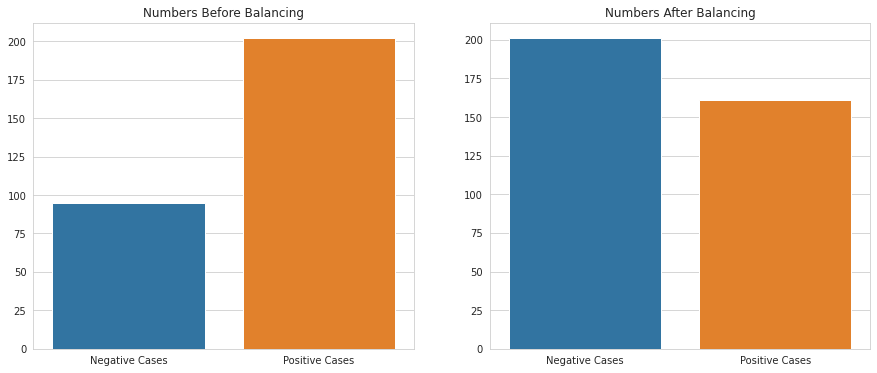

In [ ]:
labels = ["Negative Cases","Positive Cases"]
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(labels, list(num_before.values()))
plt.title("Numbers Before Balancing")
plt.subplot(1,2,2)
sns.barplot(labels, list(num_after.values()))
plt.title("Numbers After Balancing")
plt.show()

**5.2 Splitting data to Training and Testing set**

In [ ]:
# new dataset
new_data = pd.concat([pd.DataFrame(X_smote), pd.DataFrame(y_smote)], axis=1)
new_data.columns = ['age', 'creatinine_phosphokinase','platelets','ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time','DEATH_EVENT']
new_data.head()

,age,creatinine_phosphokinase,platelets,ejection_fraction,serum_creatinine,serum_sodium,time,DEATH_EVENT
0,70.0,2695.0,40.0,241000.00,1.0,137.0,247.0,0
1,42.0,5209.0,30.0,226000.00,1.0,140.0,87.0,0
2,51.0,582.0,35.0,263358.03,1.5,136.0,145.0,0
3,85.0,102.0,60.0,507000.00,3.2,138.0,94.0,0
4,62.0,281.0,35.0,221000.00,1.0,136.0,108.0,0


In [ ]:
X_new = new_data[top_features]
y_new= new_data.iloc[:,-1]
X_new.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,70.0,2695.0,241000.00,40.0,1.0,137.0,247.0
1,42.0,5209.0,226000.00,30.0,1.0,140.0,87.0
2,51.0,582.0,263358.03,35.0,1.5,136.0,145.0
3,85.0,102.0,507000.00,60.0,3.2,138.0,94.0
4,62.0,281.0,221000.00,35.0,1.0,136.0,108.0


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_new,y_new,test_size=.2,random_state=42)

**5.3 Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

**5.4 Models**

***5.4.1 Logistic regression***
 
Which models the probability of a data point belonging to a particular class and assigns this point the appropriate label based on a chosen threshold.

Using logistic regression we get an accuracy of 82.19%


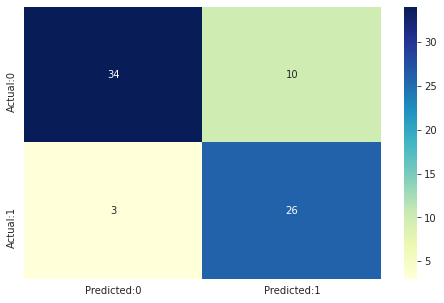

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score,precision_score,classification_report,roc_auc_score,roc_curve

# search for optimun parameters using gridsearch
params = {'penalty':['l1','l2'],
         'C':[0.01,0.1,1,10,100],
         'class_weight':['balanced',None]}
logistic_clf = GridSearchCV(LogisticRegression(),param_grid=params,cv=10)

#train the classifier
logistic_clf.fit(X_train,y_train)

#make predictions
logistic_predict = logistic_clf.predict(X_test)

log_accuracy = accuracy_score(y_test,logistic_predict)
print(f"Using logistic regression we get an accuracy of {round(log_accuracy*100,2)}%")

cm=confusion_matrix(y_test,logistic_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [ ]:
logistic_f1 = f1_score(y_test, logistic_predict)
print(f'The f1 score for logistic regression is {round(logistic_f1*100,2)}%')

The f1 score for logistic regression is 80.0%


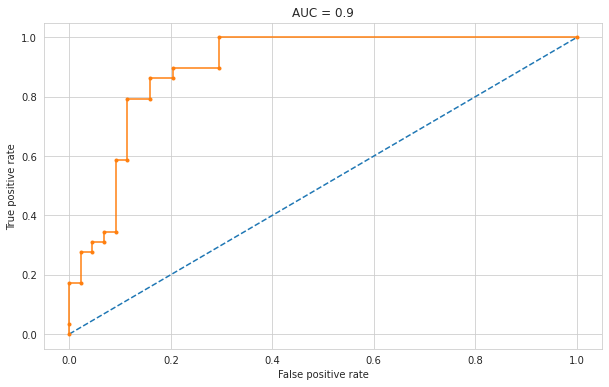

In [ ]:
# ROC curve and AUC 
probs = logistic_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(log_auc,3)}")
plt.show()

***5.4.2 k-Nearest Neighbours***

Which attempts to determine what group a data point is in by looking at the data points around it. For example, given a data point C, if the majority of the points around it are in group A, then it is likely that the data point in question will belong to group A rather than B, and vice versa.


Using k-nearest neighbours we get an accuracy of 89.04%


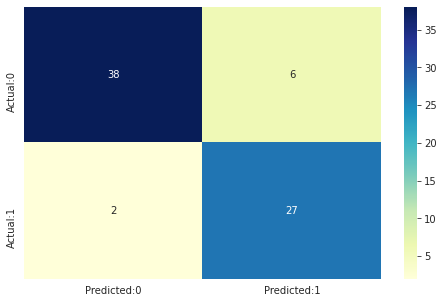

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# search for optimun parameters using gridsearch
params= {'n_neighbors': np.arange(1, 10)}
grid_search = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = params, 
                           scoring = 'accuracy', cv = 10, n_jobs = -1)
knn_clf = GridSearchCV(KNeighborsClassifier(),params,cv=3, n_jobs=-1)

# train the model
knn_clf.fit(X_train,y_train)

# predictions
knn_predict = knn_clf.predict(X_test)

#accuracy
knn_accuracy = accuracy_score(y_test,knn_predict)
print(f"Using k-nearest neighbours we get an accuracy of {round(knn_accuracy*100,2)}%")

cm=confusion_matrix(y_test,knn_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [ ]:
knn_f1 = f1_score(y_test, knn_predict)
print(f'The f1 score for K nearest neignbours is {round(knn_f1*100,2)}%')

The f1 score for K nearest neignbours is 87.1%


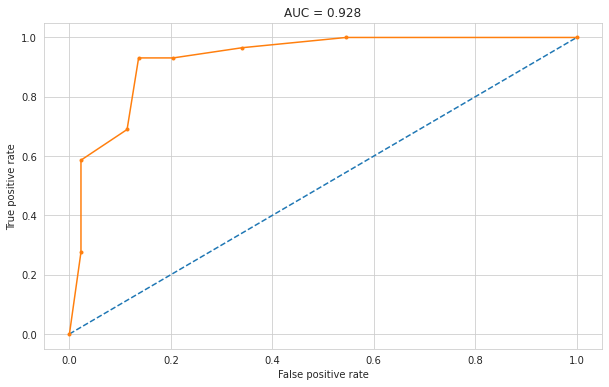

In [ ]:
# ROC curve and AUC 
probs = knn_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
knn_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(knn_auc,3)}")
plt.show()

***5.4.3 Decision Trees***

Which is based on a tree-like graph with nodes representing the place where we pick an attribute and ask a question; edges represent the answers the to the question; and the leaves represent the actual output or class label. Decision trees classify the examples by sorting them down the tree from the root to some leaf node, with the leaf node providing the classification to the example. Each node in the tree acts as a test case for some attribute, and each edge descending from that node corresponds to one of the possible answers to the test case. This process is recursive in nature and is repeated for every sub-tree rooted at the new nodes.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree= DecisionTreeClassifier(random_state=7)


# grid search for optimum parameters
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11]}
tree_clf = GridSearchCV(dtree, param_grid=params, n_jobs=-1)

# train the model
tree_clf.fit(X_train,y_train)

# predictions
tree_predict = tree_clf.predict(X_test)

#accuracy
tree_accuracy = accuracy_score(y_test,tree_predict)
print(f"Using Decision Trees we get an accuracy of {round(tree_accuracy*100,2)}%")



Using Decision Trees we get an accuracy of 84.93%


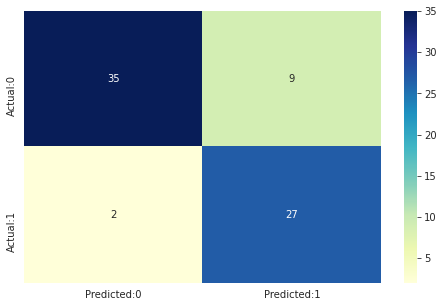

In [ ]:
cm=confusion_matrix(y_test,tree_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [ ]:
tree_f1 = f1_score(y_test, tree_predict)
print(f'The f1 score Descision trees is {round(tree_f1*100,2)}%')

The f1 score Descision trees is 83.08%


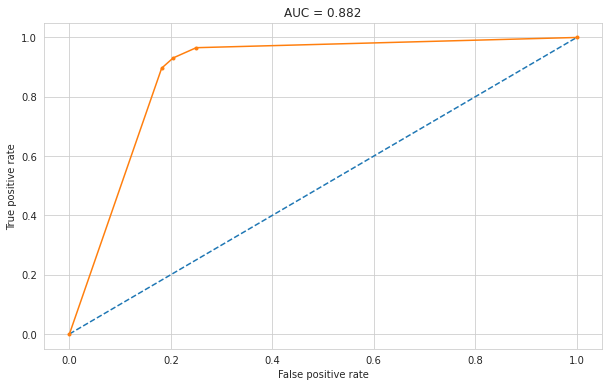

In [ ]:
# ROC curve and AUC 
probs = tree_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
tree_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(tree_auc,3)}")
plt.show()

***5.4.4 Support Vector Machine***

Which is a discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data, the algorithm outputs an optimal hyperplane which categorizes new examples based on which side they lie in relation to it. In a two dimensional space this hyperplane is a line dividing a plane in two parts where in each class lies on either side.


In [ ]:
from sklearn.svm import SVC

#grid search for optimum parameters
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
svm_clf = GridSearchCV(SVC(kernel='rbf', probability=True), param_grid, cv=10)

#train the model
svm_clf.fit(X_train,y_train)

# predictions
svm_predict = svm_clf.predict(X_test)


#accuracy
svm_accuracy = accuracy_score(y_test,svm_predict)
print(f"Using SVM we get an accuracy of {round(svm_accuracy*100,2)}%")



Using SVM we get an accuracy of 83.56%


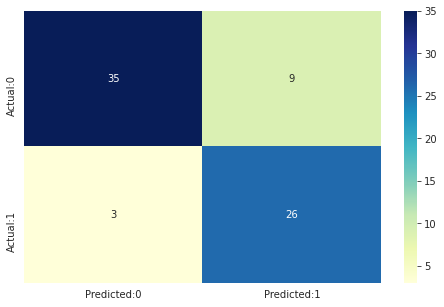

In [ ]:
cm=confusion_matrix(y_test,svm_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [ ]:
svm_f1 = f1_score(y_test, svm_predict)
print(f'The f1 score for SVM is {round(svm_f1*100,2)}%')

The f1 score for SVM is 81.25%


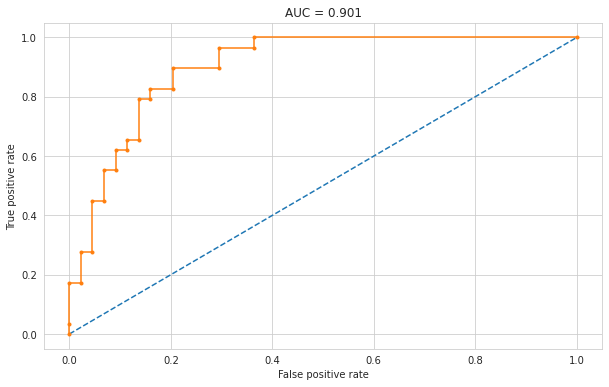

In [ ]:
# ROC curve and AUC 
probs = svm_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
svm_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(svm_auc,3)}")
plt.show()

# Evaluation

***5.5 Model Comparison***


In [ ]:
comparison = pd.DataFrame({
    "Logistic regression":{'Accuracy':log_accuracy, 'AUC':log_auc, 'F1 score':logistic_f1},
    "K-nearest neighbours":{'Accuracy':knn_accuracy, 'AUC':knn_auc, 'F1 score':knn_f1},
    "Decision trees":{'Accuracy':tree_accuracy, 'AUC':tree_auc, 'F1 score':tree_f1},
    "Support vector machine":{'Accuracy':svm_accuracy, 'AUC':svm_auc, 'F1 score':svm_f1}
}).T

comparison

,Accuracy,AUC,F1 score
Logistic regression,0.821918,0.899687,0.800000
K-nearest neighbours,0.890411,0.927900,0.870968
Decision trees,0.849315,0.882445,0.830769
Support vector machine,0.835616,0.901254,0.812500


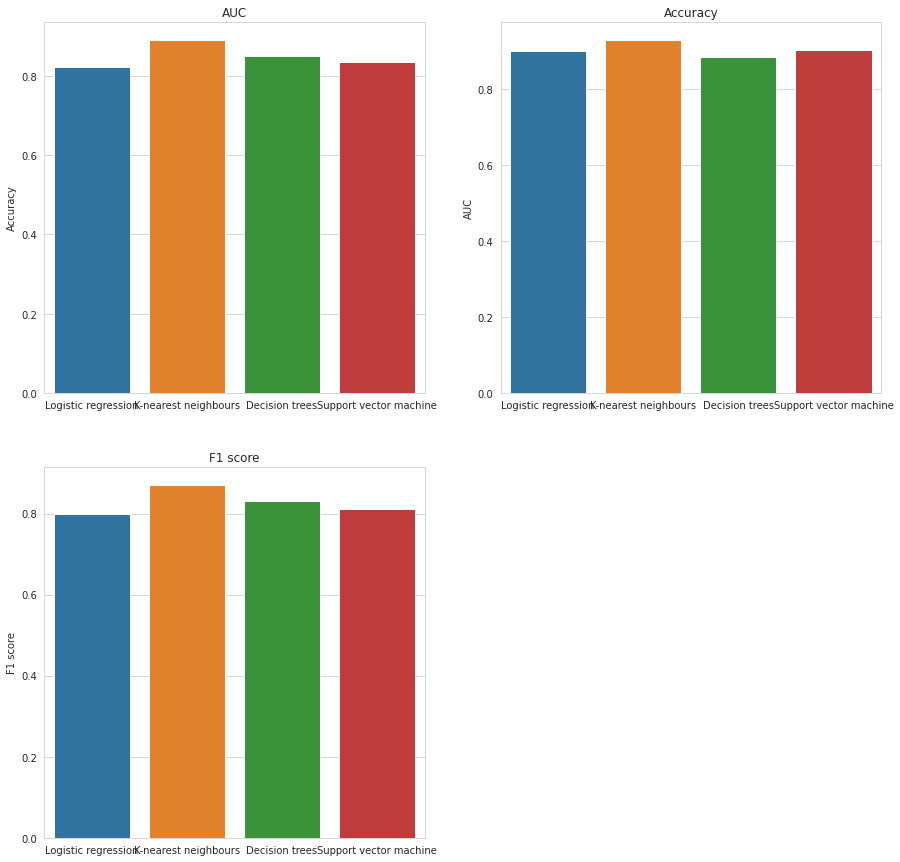

In [ ]:
fig = plt.gcf()
fig.set_size_inches(15, 15)
titles = ['AUC','Accuracy','F1 score']
for title,label in enumerate(comparison.columns):
    plt.subplot(2,2,title+1)
    sns.barplot(x=comparison.index, y = comparison[label], data=comparison)
    plt.xticks(fontsize=10)
    plt.title(titles[title])
plt.show()

The K Nearest Neighbours was the best performing model across all metrics. Its high AUC and F1 score also show that the model has a high true positive rate and is thus sensitive to predict if one has a high death

# Deployment

The immediate task for monitoring is to determine whether the heart failure prediction is actually correct and accurate. The bulk of the monitoring should be automatic with regularly scheduled reports available for review. This requires more sophistication from the team than the first data mining project.
The knowledge or information of prediction of heart failure leading to death discovered during the data mining process should be made easy to understand for non-technical stakeholders. The results are delivered in graph or chart form which make them more understandable. 
In this project, there are some similar programs so we need to select the parts that are useful in meeting the business objectives. We can also understand the whole data mining implementation process through this project. 


# Conclusion

This model can then be used as a simple screening tool and all that we need to do is to input ones: age, creatinine_phosphokinase, ejection_fraction, platelets, serum_creatinine, serum_sodium and time after which the model can be run and it outputs a prediction.
1. The most important features in predicting the death of patients were age, ejection fraction, serum creatinine and time
2. The Support vector machine with the radial kernel was the best performing model in terms of accuracy and the F1 score. Its high AUC and this shows that it has a high true positive rate.
3. Balancing the dataset by using the smote technique helped in improving the models sensitivity
4. With more data(especially that of the minority class) better models can be built

In [ ]:
my_data = pd.read_csv('my_heart_data.csv')
my_data = my_data[top_features]
my_data

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,21,230,40,259000,1.5,140,100


In [ ]:
prediction = svm_clf.predict(my_data)
print("You are at risk") if prediction[0] == 0 else print("you are at risk")

you are at risk


# Reference

https://towardsdatascience.com/heart-disease-risk-assessment-using-machine-learning-83335d077dad

https://github.com/amayomode/Heart-Disease-Risk-Prediction/blob/master/Heart%20Disease%20Prediction/heart_disease_prediction.ipynb

https://www.kaggle.com/sanchitakarmakar/heart-failure-prediction-visualization

# Appendix

[my_hear_data.csv](https://docs.google.com/spreadsheets/d/1UUzo-4c6voB1Jr-OirF68Ikyb28PEZxFF9GqUyFEf_U/edit#gid=0)

[heart_failure_clinical_records_dataset.csv](https://docs.google.com/spreadsheets/d/1Gld_IqXfPGxRso-KTvT7NtUwFQYOwnxt15MpZwkxFQA/edit#gid=403982379)